<a href="https://colab.research.google.com/github/nguyenhieu-09/machine-learning/blob/main/Machine_Learning_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Following Libraries are being used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor
from sklearn.ensemble import BaggingRegressor #Bagging Regressor
from sklearn.neighbors import KNeighborsRegressor #KNN Regressor
from sklearn.linear_model import LinearRegression #Linear Regressor

In [ ]:
# Tải dữ liệu
df = pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
# Kiểm tra kích thước của dữ liệu
df.shape

(10841, 13)

In [ ]:
# miêu tả
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# Kiểm tra kiểu dữ liệu
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

 **Sắp xếp và tiền xử lý dữ liệu**
 Các bước thực hiện trong quá trình tiền xử lý như sau:

Tìm giá trị Null hoặc Thiếu

Thay đổi loại dữ liệu của các tính năng, nếu được yêu cầu

Mã hóa dữ liệu của các tính năng phân loại

Xử lý các giá trị Null hoặc Thiếu


In [ ]:
# Bỏ đi các cột không sử dụng
df = df.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])

In [ ]:
# Kiểm tra các giá trị còn thiếu trong từng cột dữ liệu huấn luyện
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [ ]:
# Kiểm tra bản ghi nào có xếp hạng> 5 không
df[df['Rating'] > 5]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18


In [ ]:
rec = df[df['Category'] == '1.9'].index
df = df.drop(rec)

In [ ]:
#Tạo một bản sao của DataFrame và lưu trữ trong train_data
train_data = df.copy()

In [ ]:
# Xử lý cột "Giá"
train_data['Price'] = train_data['Price'].apply(lambda x : x.strip('$'))
# Xử lý cột "Cài đặt"
train_data['Installs'] = train_data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [ ]:
# Chuyển đổi sang kiểu dữ liệu float
train_data['Price'] = train_data['Price'].astype(float)
train_data['Installs'] = train_data['Installs'].astype(float)
train_data['Reviews'] = train_data['Reviews'].astype(float)

In [ ]:
# Sẽ không chứa bất kỳ bản ghi nào có giá trị NaN trong cột 'Type'.
rec = train_data[train_data['Type'].isnull()].index
train_data = train_data.drop(rec)

In [ ]:
#  lưu trữ tất cả các cột có kiểu dữ liệu 'object'
col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list

['Category', 'Size', 'Type', 'Content Rating', 'Genres']

In [ ]:
# Mã hóa các tính năng ngoại trừ "size"
for c in col_list:
    if c != 'Size':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [ ]:
# Chuyển đổi các biến phân loại thành dạng số
print(df['Type'].unique().tolist())
print(train_data['Type'].unique().tolist(), '\n')

['Free', 'Paid', nan]
[0, 1] 



In [ ]:
# để xác định rõ ràng rằng giá trị "Varies with device" trong cột 'Size' sẽ được coi như giá trị thiếu (null)
train_data.loc[train_data['Size'] == 'Varies with device', 'Size'] = np.nan

In [ ]:
# Loại bỏ hậu tố: Xóa hậu tố 'k' hoặc 'M' từ các giá trị trong cột 'Size'.
# Chuyển đổi kiểu dữ liệu: Chuyển đổi các giá trị trong cột 'Size' thành kiểu dữ liệu float.
# Trích xuất hậu tố: Trích xuất hậu tố 'k' hoặc 'M' từ các giá trị trong cột 'Size'.
# Xử lý giá trị None: Thay thế các giá trị None (nếu có) bằng giá trị 1.0 để giữ lại giá trị mặc định.
# Chuyển đổi đơn vị: Thay thế 'k' bằng 10^3 và 'M' bằng 10^6, biến đổi các giá trị thành đơn vị bytes.
# Chuyển đổi kiểu số nguyên: Chuyển đổi tất cả các giá trị trong cột 'Size' thành kiểu số nguyên.
# Gán lại giá trị: Gán lại cột 'Size' trong DataFrame train_data với giá trị đã được xử lý.
train_data.Size = (train_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             train_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [ ]:

train_data.isnull().sum()

Category             0
Rating            1473
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

Vì kích thước và xếp hạng có số lượng lớn các giá trị bị thiếu nên sẽ không phải là cách tiếp cận tốt để điền chúng bằng giá trị trung bình hoặc giá trị trung bình nên tôi sử dụng mô hình hồi quy tuyến tính để điền vào các giá trị còn thiếu này.

In [ ]:
# Điền các giá trị còn thiếu trong cột 'Size' bằng cách sử dụng mô hình hồi quy tuyến tính
X = train_data[train_data['Size'].notnull()]
y = train_data.loc[train_data['Size'].notnull(), 'Size']
X = X.drop(columns=['Size', 'Rating'])


model = linear_model.LinearRegression()
model.fit(X, y)


X_miss = train_data[train_data['Size'].isnull()]
X_miss = X_miss.drop(columns = ['Size', 'Rating'])


train_data.loc[train_data['Size'].isnull(), 'Size'] = model.predict(X_miss)

In [ ]:
# điền các giá trị còn thiếu trong cột 'Rating' bằng cách sử dụng mô hình hồi quy tuyến tính
X = train_data[train_data['Rating'].notnull()]
y = train_data.loc[train_data['Rating'].notnull(), 'Rating']
X = X.drop(columns=['Rating'])


model = linear_model.LinearRegression()
model.fit(X, y)


X_miss = train_data[train_data['Rating'].isnull()]
X_miss = X_miss.drop(columns = ['Rating'])


train_data.loc[train_data['Rating'].isnull(), 'Rating'] = model.predict(X_miss)

In [ ]:
train_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [ ]:
train_data.dtypes

Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
dtype: object

In [ ]:
train_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159.0,19000000.0,10000.0,0,0.0,1,9
1,0,3.9,967.0,14000000.0,500000.0,0,0.0,1,12
2,0,4.7,87510.0,8700000.0,5000000.0,0,0.0,1,9
3,0,4.5,215644.0,25000000.0,50000000.0,0,0.0,4,9
4,0,4.3,967.0,2800000.0,100000.0,0,0.0,1,11


Trực quan hoá dữ liệu

<Axes: >

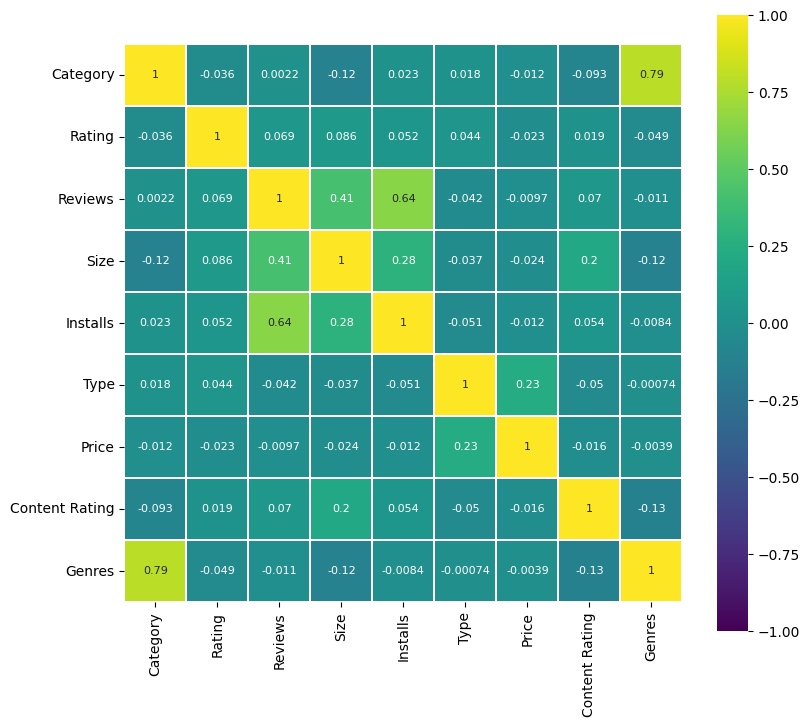

In [ ]:
corr = train_data.corr()
plt.figure(figsize=(9, 8))

sns.heatmap(corr[(corr >= 0) | (corr <= 0)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Text(0.5, 1.0, 'Phân phối xếp hạng')

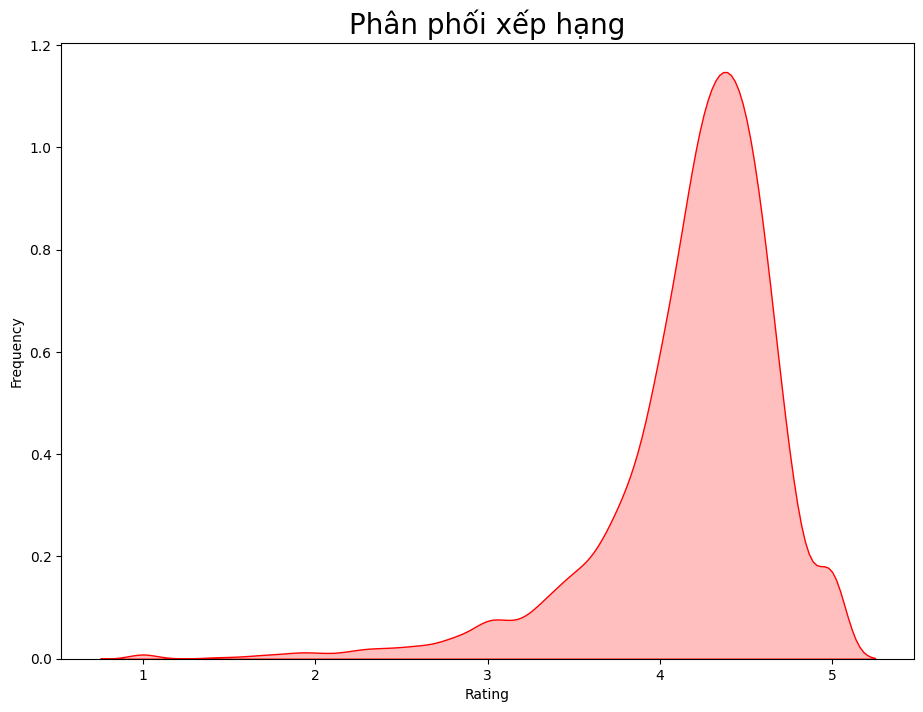

In [ ]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# phân bổ xếp hạng
rcParams['figure.figsize'] = 11,8
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Phân phối xếp hạng',size = 20)

trung bình ứng dụng trong cửa hàng là khoảng 4,3.

Text(0.5, 1.0, 'Số lượng ứng dụng trong mỗi danh mục')

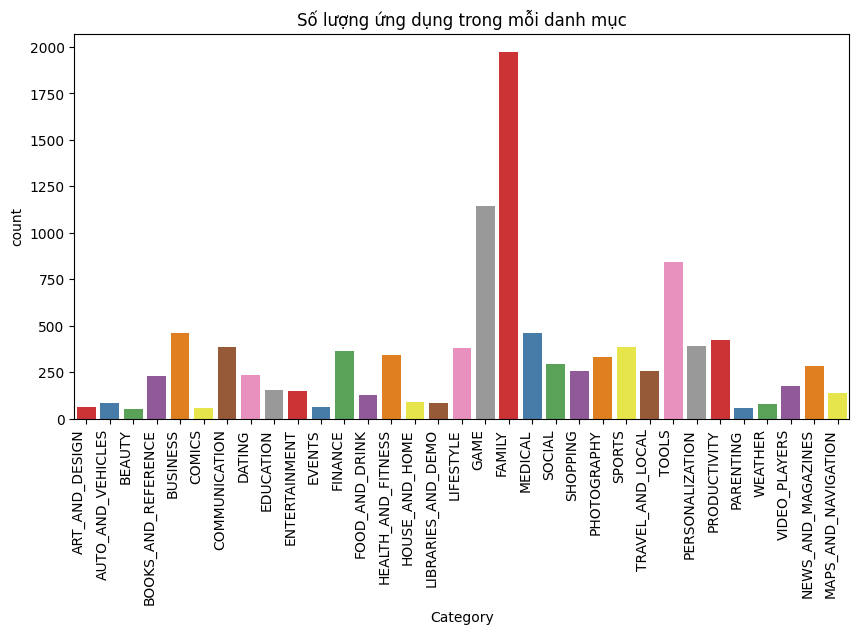

In [ ]:
# Thiết lập kích thước của hình vẽ
plt.figure(figsize=(10, 5))

# Tạo biểu đồ countplot với seaborn
g = sns.countplot(x="Category", data=df, palette="Set1")

# Điều chỉnh góc quay và căn lề của nhãn trục x để dễ đọc hơn
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
# Đặt tiêu đề cho biểu đồ
plt.title('Số lượng ứng dụng trong mỗi danh mục')

Danh mục Game và Gia đình  xuất hiện nhiều nhất trong cửa hàng

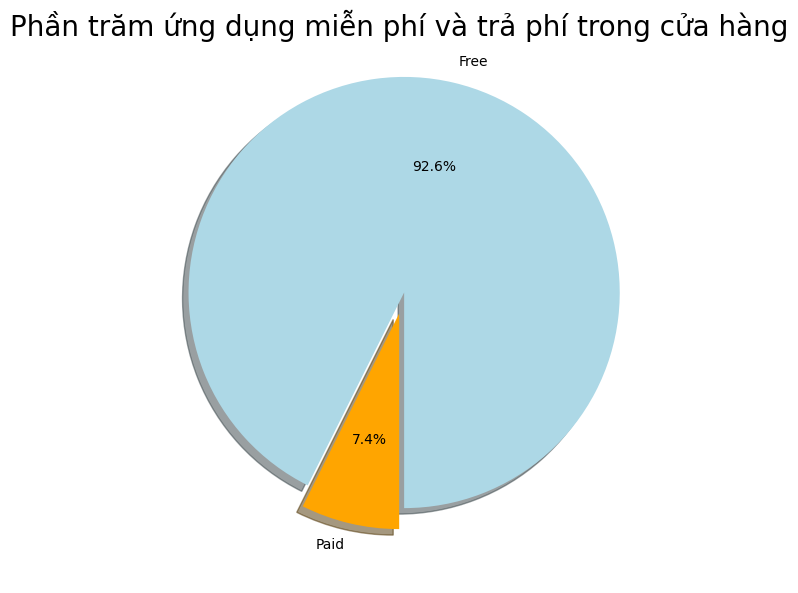

In [ ]:
# Lấy nhãn (labels) và số lượng (sizes) của cột 'Type' từ DataFrame
labels = df['Type'].value_counts(sort=True).index
sizes = df['Type'].value_counts(sort=True)

# Màu sắc cho các phần của biểu đồ
colors = ["lightblue", "orange"]

# Xác định phần bị tách ra (explode), trong trường hợp này tách phần đầu tiên (miễn phí)
explode = (0.1, 0)

# Thiết lập kích thước của hình vẽ
rcParams['figure.figsize'] = 7, 7

# Vẽ biểu đồ pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270)

# Đặt tiêu đề cho biểu đồ
plt.title('Phần trăm ứng dụng miễn phí và trả phí trong cửa hàng', size=20)

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Chuẩn hóa dữ liệu
# Chọn Cột để Không Chuẩn Hóa:
cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Rating']

# Chọn Các Cột Cần Chuẩn Hóa
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

#Kiểm tra dữ liệu sau khi chuẩn hóan
train_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,-0.151664,-0.140860,-0.181770,0,-0.064419,1,9
1,0,3.9,-0.151388,-0.366005,-0.176007,0,-0.064419,1,12
2,0,4.7,-0.121828,-0.604659,-0.123084,0,-0.064419,1,9
3,0,4.5,-0.078063,0.129314,0.406145,0,-0.064419,4,9
4,0,4.3,-0.151388,-0.870330,-0.180712,0,-0.064419,1,11


In [ ]:
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Xác định Biến Phụ Thuộc và Độc Lập:
y = train_data['Rating']
X = train_data.drop(columns=['Rating'])
# Chia Dữ Liệu:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# In Kích Thước của Tập Huấn Luyện và Tập Kiểm Tra:
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (8671, 8)
Validation Set Dimensions: (2168, 8)


Tập huấn luyện (Training Set) có kích thước là 8671 dòng và 8 cột. Điều này có nghĩa là có 8671 mẫu dữ liệu được sử dụng để đào tạo mô hình, và mỗi mẫu có 8 đặc trưng (hoặc biến độc lập).

Tập kiểm tra (Validation Set) có kích thước là 2168 dòng và 8 cột. Điều này có nghĩa là có 2168 mẫu dữ liệu được sử dụng để kiểm tra hiệu suất của mô hình, và mỗi mẫu cũng có 8 đặc trưng.

**Random Forest Regressor**

In [ ]:
# Tạo và Đào Tạo Mô Hình:
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train)

# In giá trị Bình phương Sai trung bình cho tập Huấn luyện
mse_train = mean_squared_error(y_train, randomf.predict(X_train))
print('Bình phương Sai trung bình cho Tập Huấn luyện:', mse_train)

# In giá trị Bình phương Sai trung bình cho tập Kiểm tra
mse_test = mean_squared_error(y_test, randomf.predict(X_test))
print('Bình phương Sai trung bình cho Tập Kiểm tra:', mse_test)

Bình phương Sai trung bình cho Tập Huấn luyện: 0.027528823062102845
Bình phương Sai trung bình cho Tập Kiểm tra: 0.1992709997452272


Mô hình sau đó được đào tạo trên tập huấn luyện (X_train, y_train), nơi mà nó học từ dữ liệu để có thể dự đoán giá trị y (trong trường hợp này, là 'Rating') dựa trên các đặc trưng X.

feature: Category = 0.09441773900305704
feature: Reviews = 0.3518786182420044
feature: Size = 0.2950805961119205
feature: Installs = 0.09865539069781246
feature: Type = 0.00501559593272933
feature: Price = 0.022005419749065253
feature: Content Rating = 0.025972151192530372
feature: Genres = 0.10697448907088074


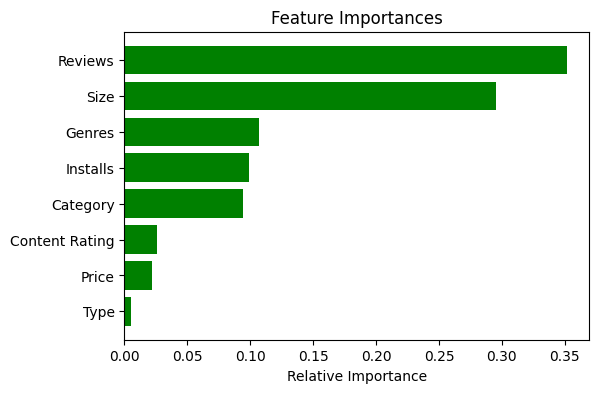

In [ ]:
# In ra độ quan trọng của các đặc trưng:
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)

importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Các giá trị trên thể hiện phần trăm đóng góp của mỗi đặc trưng vào quyết định của mô hình. Nhìn chung, có vẻ như Reviews, Size, và Genres đóng góp nhiều nhất vào quyết định của mô hình, trong khi Type và Price có đóng góp thấp hơn.

KNN Regressor

In [ ]:
# Tạo và Đào tạo Mô hình KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# Đánh giá hiệu suất bằng Bình phương Sai trung bình
print('Bình phương Sai trung bình cho Tập Huấn luyện:', mean_squared_error(y_train, knr.predict(X_train)))
print('Bình phương Sai trung bình cho Tập Kiểm tra:', mean_squared_error(y_test, knr.predict(X_test)))


Bình phương Sai trung bình cho Tập Huấn luyện: 0.16020490269833168
Bình phương Sai trung bình cho Tập Kiểm tra: 0.24956782406419503


In [ ]:
# Tạo và Đào tạo Mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá hiệu suất bằng Bình phương Sai trung bình
print('Bình phương Sai trung bình cho Tập Huấn luyện:', mean_squared_error(y_train, model.predict(X_train)))
print('Bình phương Sai trung bình cho Tập Kiểm tra:', mean_squared_error(y_test, model.predict(X_test)))


Bình phương Sai trung bình cho Tập Huấn luyện: 0.22610836280395544
Bình phương Sai trung bình cho Tập Kiểm tra: 0.22800484002972693


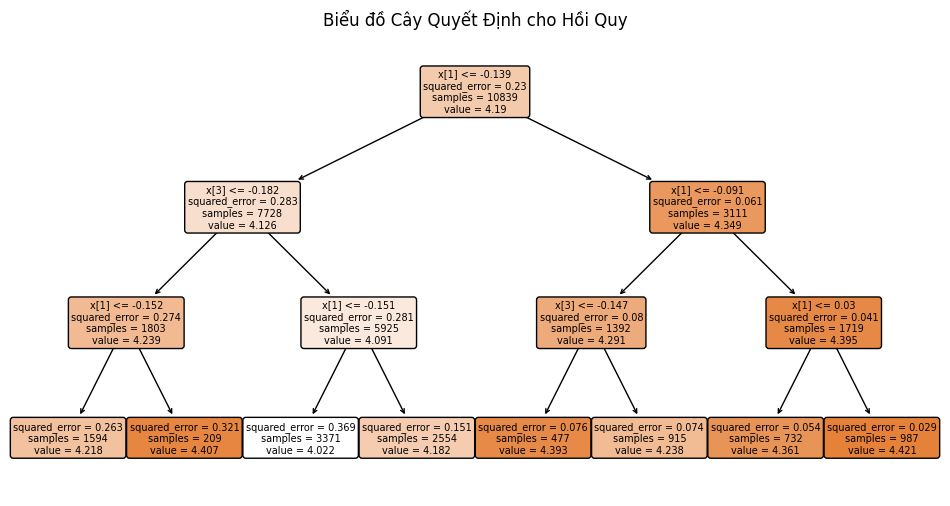

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Tạo một mô hình cây quyết định cho bài toán hồi quy với độ sâu tối đa là 3
regression_tree = DecisionTreeRegressor(max_depth=3)

# Huấn luyện mô hình cây quyết định trên dữ liệu (X, y)
regression_tree.fit(X, y)

# Hiển thị biểu đồ cây quyết định
plt.figure(figsize=(12, 6))
plot_tree(regression_tree, filled=True, rounded=True)
plt.title("Biểu đồ Cây Quyết Định cho Hồi Quy")
plt.show()


In [ ]:
# Tạo một mô hình cây quyết định với độ sâu tối đa là 3
regression_tree = DecisionTreeRegressor(max_depth=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện (X_train, y_train)
regression_tree.fit(X_train, y_train)

# Thực hiện dự đoán trên dữ liệu kiểm thử (X_test)
y_pred = regression_tree.predict(X_test)

# Đánh giá mô hình bằng cách tính Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# In ra giá trị MSE để đánh giá chất lượng của mô hình
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2119765164071762


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Tạo một list để lưu giá trị MSE cho mỗi độ sâu
mse_values = []

# Lặp qua các giá trị từ 3 đến 20 cho max_depth
for depth in range(3, 21):
    # Tạo mô hình cây quyết định với độ sâu là depth
    regression_tree = DecisionTreeRegressor(max_depth=depth)

    # Huấn luyện mô hình trên dữ liệu huấn luyện (X_train, y_train)
    regression_tree.fit(X_train, y_train)

    # Thực hiện dự đoán trên dữ liệu kiểm thử (X_test)
    y_pred = regression_tree.predict(X_test)

    # Đánh giá mô hình bằng cách tính Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # In ra giá trị MSE để đánh giá chất lượng của mô hình
    print(f"Max Depth: {depth}, Mean Squared Error: {mse}")

    # Lưu giá trị MSE vào list
    mse_values.append(mse)


Max Depth: 3, Mean Squared Error: 0.2119765164071763
Max Depth: 4, Mean Squared Error: 0.20936069173896468
Max Depth: 5, Mean Squared Error: 0.20779751045431874
Max Depth: 6, Mean Squared Error: 0.20772782113121646
Max Depth: 7, Mean Squared Error: 0.21188749748403238
Max Depth: 8, Mean Squared Error: 0.21902834522675413
Max Depth: 9, Mean Squared Error: 0.22750104217081002
Max Depth: 10, Mean Squared Error: 0.24079648207911464
Max Depth: 11, Mean Squared Error: 0.24778146590847255
Max Depth: 12, Mean Squared Error: 0.2566296021352703
Max Depth: 13, Mean Squared Error: 0.26681188806311157
Max Depth: 14, Mean Squared Error: 0.27643385889720923
Max Depth: 15, Mean Squared Error: 0.287117193966967
Max Depth: 16, Mean Squared Error: 0.2940765502729639
Max Depth: 17, Mean Squared Error: 0.3163079598246589
Max Depth: 18, Mean Squared Error: 0.3188510010186719
Max Depth: 19, Mean Squared Error: 0.33456551324178785
Max Depth: 20, Mean Squared Error: 0.3356326098494601


In [ ]:
from sklearn.model_selection import cross_val_score

# Sử dụng model đã được đào tạo từ trước đó
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mean_score = -scores.mean()  # Chuyển đổi sang giá trị dương để có Mean Squared Error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 0.226429505641768


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Đào tạo mô hình rf_model
rf_model = RandomForestRegressor()
X_train = StandardScaler().fit_transform(X_train)
y_train_scaled = StandardScaler().fit_transform(y_train.to_numpy().reshape(-1, 1))
rf_model.fit(X_train, y_train_scaled)

# Sử dụng rf_model đã được đào tạo từ trước đó
scores = cross_val_score(rf_model, X_train, y_train_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')

mean_score = -scores.mean()  # Chuyển đổi sang giá trị dương để có Mean Squared Error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 0.8833032268436332
